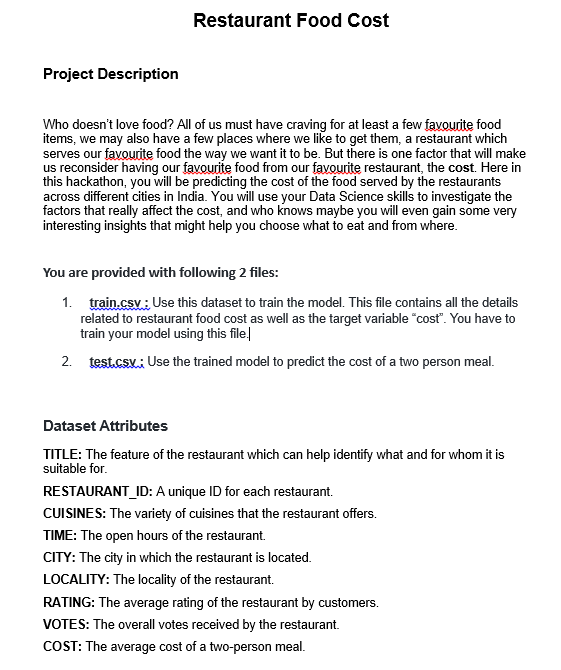
Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_test = pd.read_excel(r'E:\D\Data Trained\Data_Test_Restaurant Food Cost.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [6]:
df_train = pd.read_excel(r'E:\D\Data Trained\Data_Train_Restaurant Food Cost.xlsx')
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [ ]:
# There are lots ofmissing values in the dataset 

In [4]:
df_train.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [8]:
for i in df_train.columns:
    print("Unique values in", i, df_train[i].nunique())

Unique values in TITLE 112
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


In [ ]:
#Data pre-processing

In [9]:
# merge train and test
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          15634 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [8]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [9]:
for i in df.columns:
    print(df[i].value_counts())

TITLE
QUICK BITES                 5634
CASUAL DINING               4910
CAFÉ                         830
DESSERT PARLOR               508
CASUAL DINING,BAR            463
                            ... 
QUICK BITES,BAR                1
BEVERAGE SHOP,FOOD COURT       1
MEAT SHOP                      1
BAKERY,CONFECTIONERY           1
BHOJANALYA                     1
Name: count, Length: 122, dtype: int64
RESTAURANT_ID
4634    8
7264    8
7745    7
4058    7
8032    7
       ..
8479    1
3463    1
4723    1
4844    1
2421    1
Name: count, Length: 15574, dtype: int64
CUISINES
North Indian                       716
North Indian, Chinese              714
South Indian                       706
Fast Food                          364
Chinese                            226
                                  ... 
Italian, Continental, Salad          1
Chinese, Arabian, North Indian       1
Italian, Mexican, Salad              1
South Indian, Chinese, Desserts      1
Sindhi, Street Food         

In [10]:
import re

In [11]:
#Define the extract_closed function:

def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'
    
#Create the CLOSED column

df['CLOSED'] = df['TIME'].apply(extract_closed)

#Remove the Closed (anything) substring from the TIME column:

df['TIME'] = df['TIME'].str.replace(r'Closed \(.*?\)','')

#Replace values in the RATING column:

df['RATING'] = df['RATING'].str.replace('NEW', '1')
df['RATING'] = df['RATING'].str.replace('-', '1').astype(float)

# Convert the VOTES column to numerical format

df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          15634 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  float64
 7   VOTES          15315 non-null  float64
 8   COST           12690 non-null  float64
 9   CLOSED         16921 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [12]:
mean_rating = df['RATING'].mean()
print(mean_rating)

3.5207897381332387


In [13]:
mean_vote = df['VOTES'].mean()
print(mean_vote)

419.19425399934704


In [14]:
df['CITY'].fillna('Missing', inplace=True)  # filling "Missing" in na
df['LOCALITY'].fillna('Missing', inplace=True)  # filling "Missing" in na
df['RATING'].fillna(3.5, inplace=True)  # fillin mean in na
df['VOTES'].fillna(0.0, inplace=True)  # filling 0 in voting

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          15634 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16921 non-null  object 
 5   LOCALITY       16921 non-null  object 
 6   RATING         16921 non-null  float64
 7   VOTES          16921 non-null  float64
 8   COST           12690 non-null  float64
 9   CLOSED         16921 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [ ]:
#still we have missing values in Title and Cost 

In [16]:
df['COST'] = df['COST'].astype(float)

In [17]:
df.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA


In [18]:
df['TITLE'].nunique(), df['CUISINES'].nunique()

(122, 5183)

In [19]:
calc_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
df = df.merge(calc_mean, on=['CITY'],how='left')

calc_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
df = df.merge(calc_mean, on=['LOCALITY'],how='left')

In [23]:
df.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CLOSED,CITY_MEAN_RATING,LOCALITY_MEAN_RATING
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,NA,3.376271,3.388889
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,NA,3.584588,3.472222


In [20]:
calc_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
df = df.merge(calc_mean, on=['CITY'],how='left')

calc_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
df = df.merge(calc_mean, on=['LOCALITY'],how='left')

In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN values with an empty string in the relevant columns
df['TITLE'] = df['TITLE'].fillna('')
df['CUISINES'] = df['CUISINES'].fillna('')
df['CITY'] = df['CITY'].fillna('')
df['LOCALITY'] = df['LOCALITY'].fillna('')
df['TIME'] = df['TIME'].fillna('')

# Apply TfidfVectorizer on the 'TITLE' column
tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_title = tf1.fit_transform(df['TITLE'])
df_title = pd.DataFrame(data=df_title.toarray(), columns=tf1.get_feature_names_out())

# Apply TfidfVectorizer on the 'CUISINES' column
tf2 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_cuisines = tf2.fit_transform(df['CUISINES'])
df_cuisines = pd.DataFrame(data=df_cuisines.toarray(), columns=tf2.get_feature_names_out())

# Apply TfidfVectorizer on the 'CITY' column
tf3 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_city = tf3.fit_transform(df['CITY'])
df_city = pd.DataFrame(data=df_city.toarray(), columns=tf3.get_feature_names_out())

# Apply TfidfVectorizer on the 'LOCALITY' column
tf4 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_locality = tf4.fit_transform(df['LOCALITY'])
df_locality = pd.DataFrame(data=df_locality.toarray(), columns=tf4.get_feature_names_out())

# Apply TfidfVectorizer on the 'TIME' column
tf5 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
df_time = tf5.fit_transform(df['TIME'])
df_time = pd.DataFrame(data=df_time.toarray(), columns=tf5.get_feature_names_out())


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TITLE                   16921 non-null  object 
 1   RESTAURANT_ID           16921 non-null  int64  
 2   CUISINES                16921 non-null  object 
 3   TIME                    16921 non-null  object 
 4   CITY                    16921 non-null  object 
 5   LOCALITY                16921 non-null  object 
 6   RATING                  16921 non-null  float64
 7   VOTES                   16921 non-null  float64
 8   COST                    12690 non-null  float64
 9   CLOSED                  16921 non-null  object 
 10  CITY_MEAN_RATING_x      16921 non-null  float64
 11  LOCALITY_MEAN_RATING_x  16921 non-null  float64
 12  CITY_MEAN_RATING_y      16921 non-null  float64
 13  LOCALITY_MEAN_RATING_y  16921 non-null  float64
dtypes: float64(7), int64(1), object(6)
mem

In [22]:
df = pd.concat([df, df_title, df_cuisines, df_city, df_locality, df_time], axis=1) 
df.drop(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'TIME'], axis=1, inplace=True)

In [23]:
df = pd.get_dummies(df, columns=['CLOSED'], drop_first=True)

In [29]:
df.shape

(16921, 2287)

In [24]:
train_df = df[df['COST'].isnull()!=True]
test_df = df[df['COST'].isnull()==True]
test_df.drop('COST', axis=1, inplace=True)

In [25]:
train_df.shape, test_df.shape

((12690, 2287), (4231, 2286))

In [26]:
train_df['COST'] = np.log1p(train_df['COST'])

In [57]:
#Train test split

In [27]:
X = train_df.drop(labels=['COST'], axis=1)
y = train_df['COST'].values

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
x_train.shape, y_train.shape, x_cv.shape, y_cv.shape

((9517, 2286), (9517,), (3173, 2286), (3173,))

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from  sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

# Model building

In [30]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_cv)
pred_Train=LR.predict(x_train)
print(LR)
print('R2_Score:', r2_score(y_cv,predLR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,predLR))
print('Mean scuared error: :', mean_squared_error(y_cv,predLR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,predLR)))




LinearRegression()
R2_Score: -239237859.53456032
R2 Score on traing data:  0.7939003506314488
Mean absulute error: 1142.9774560086616
Mean scuared error: : 122309850.66354997
Root Mean scuared error: : 11059.378403126912


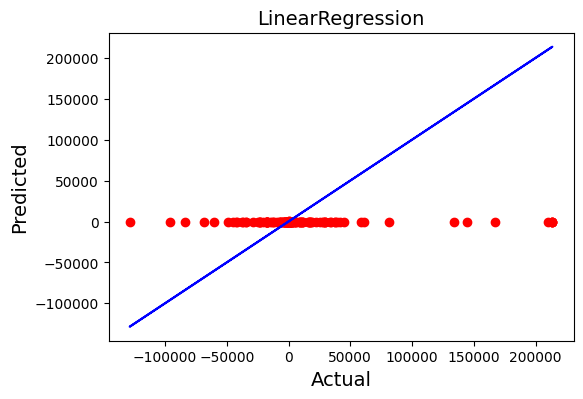

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(x=predLR,y=y_cv,color='red')
plt.plot(predLR,predLR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegression',fontsize=14)
plt.show()

RandomForestRegressor()
R2_Score: 0.7457031966027379
R2 Score on traing data:  0.9649884738098956
Mean absulute error: 0.2761290611947209
Mean scuared error: : 0.13000870338097728
Root Mean scuared error: : 0.36056719676223636


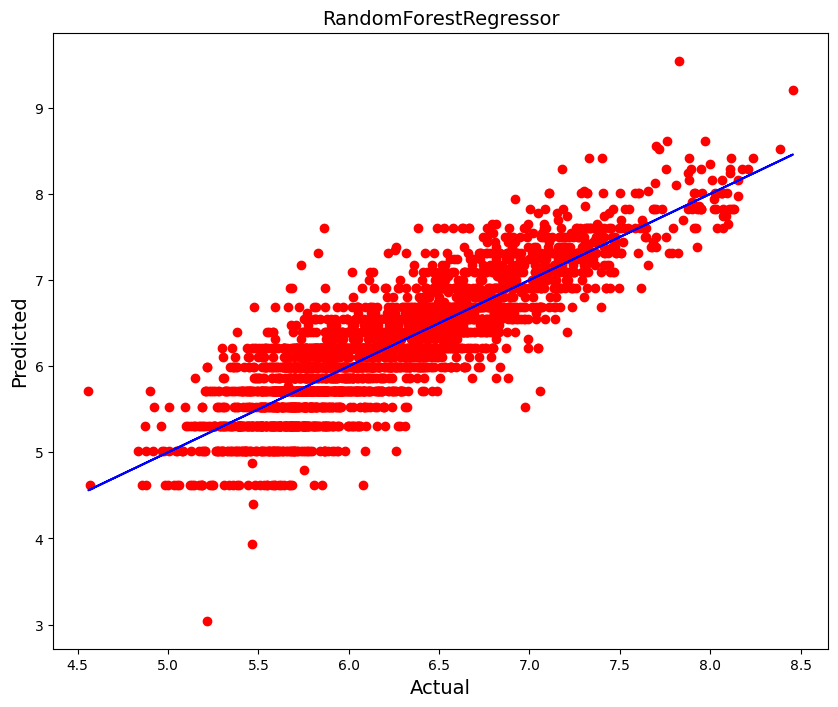

In [33]:
RDF=RandomForestRegressor()
RDF.fit(x_train,y_train)
pred_RDF=RDF.predict(x_cv)
pred_Train=RDF.predict(x_train)
print(RDF)
print('R2_Score:', r2_score(y_cv,pred_RDF))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_RDF))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_RDF))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_RDF)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_RDF,y=y_cv,color='red')
plt.plot(pred_RDF,pred_RDF,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('RandomForestRegressor',fontsize=14)
plt.show()

KNeighborsRegressor()
R2_Score: 0.08994808704013568
R2 Score on traing data:  0.40932388438188017
Mean absulute error: 0.5220925619569414
Mean scuared error: : 0.4652621174653891
Root Mean scuared error: : 0.6821012516227991


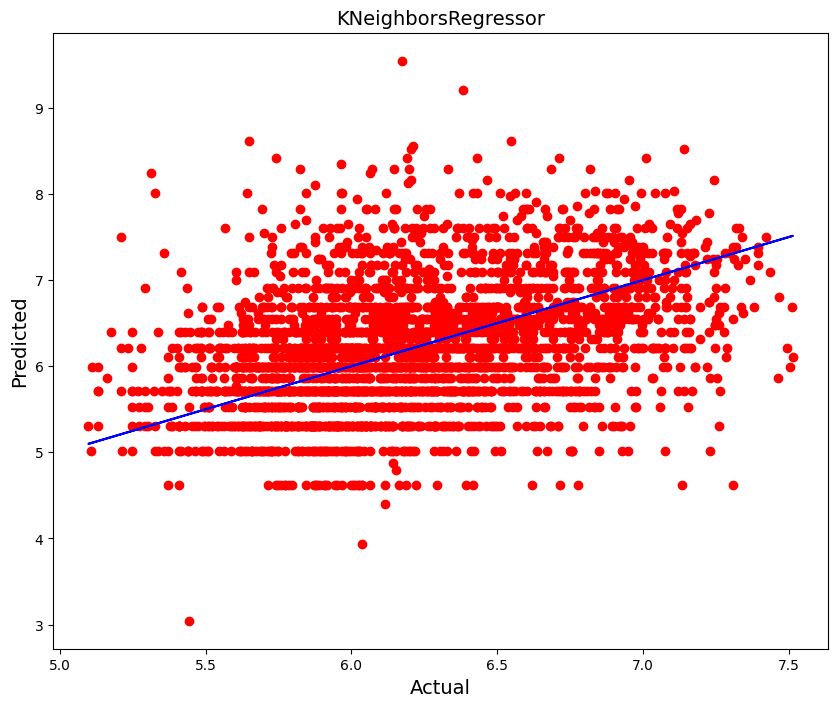

In [34]:
KN=KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_cv)
pred_Train=KN.predict(x_train)
print(KN)
print('R2_Score:', r2_score(y_cv,pred_KN))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_KN))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_KN))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_KN)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_KN,y=y_cv,color='red')
plt.plot(pred_KN,pred_KN,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=14)
plt.show()

GradientBoostingRegressor()
R2_Score: 0.7260452847788049
R2 Score on traing data:  0.7564099297524483
Mean absulute error: 0.28882009560334465
Mean scuared error: : 0.14005876926172917
Root Mean scuared error: : 0.3742442641667727


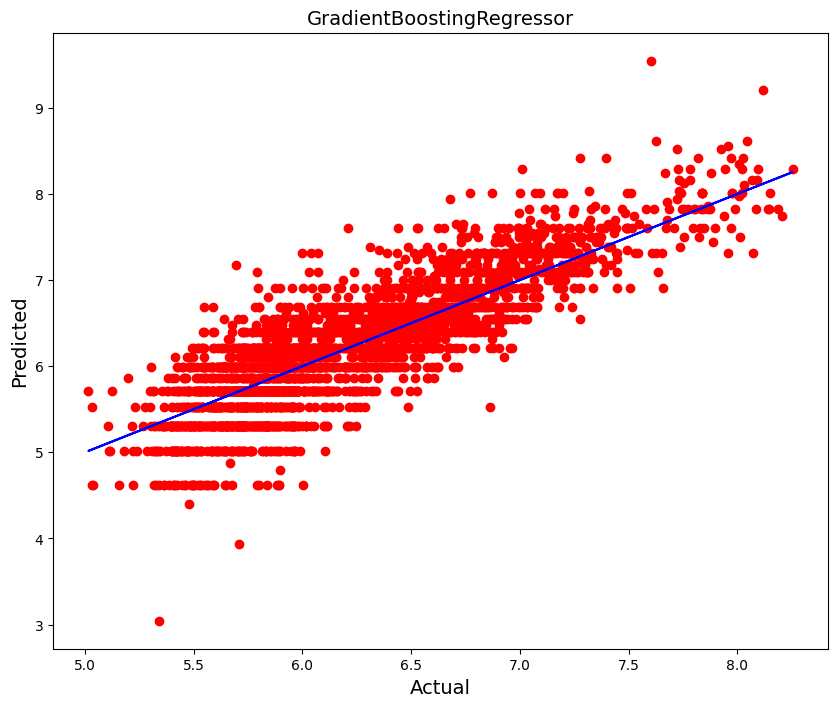

In [35]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_cv)
pred_Train=GBR.predict(x_train)
print(GBR)
print('R2_Score:', r2_score(y_cv,pred_GBR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_GBR))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_GBR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_GBR)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_GBR,y=y_cv,color='red')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=14)
plt.show()

Lasso()
R2_Score: 0.10436911196808563
R2 Score on traing data:  0.09025254350723355
Mean absulute error: 0.5220001066915048
Mean scuared error: : 0.45788939894411607
Root Mean scuared error: : 0.6766752536809042


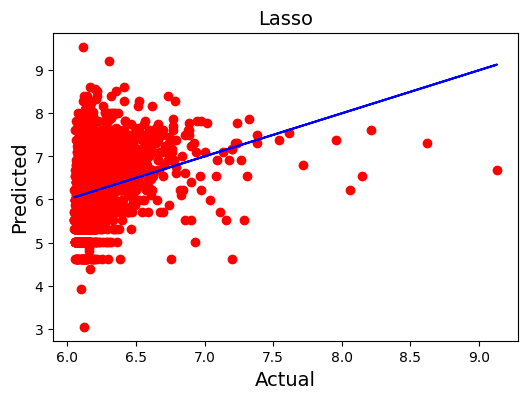

In [36]:
LS=Lasso()
LS.fit(x_train,y_train)
pred_LS=LS.predict(x_cv)
pred_Train=LS.predict(x_train)
print(LS)
print('R2_Score:', r2_score(y_cv,pred_LS))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_LS))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_LS))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_LS)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_LS,y=y_cv,color='red')
plt.plot(pred_LS,pred_LS,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=14)
plt.show()

Ridge()
R2_Score: 0.7302094999039999
R2 Score on traing data:  0.7860679138177997
Mean absulute error: 0.29129801949002676
Mean scuared error: : 0.13792982307839755
Root Mean scuared error: : 0.3713890454474897


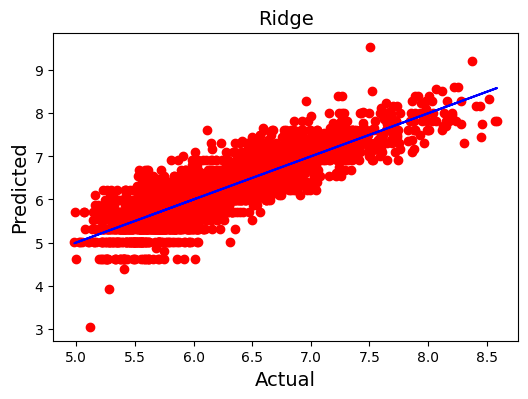

In [37]:
RD=Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_cv)
pred_Train=RD.predict(x_train)
print(RD)
print('R2_Score:', r2_score(y_cv,pred_RD))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_RD))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_RD))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_RD)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_RD,y=y_cv,color='red')
plt.plot(pred_RD,pred_RD,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge',fontsize=14)
plt.show()

DecisionTreeRegressor()
R2_Score: 0.5304596545633663
R2 Score on traing data:  1.0
Mean absulute error: 0.37263704699159406
Mean scuared error: : 0.24005150941637884
Root Mean scuared error: : 0.48995051731412514


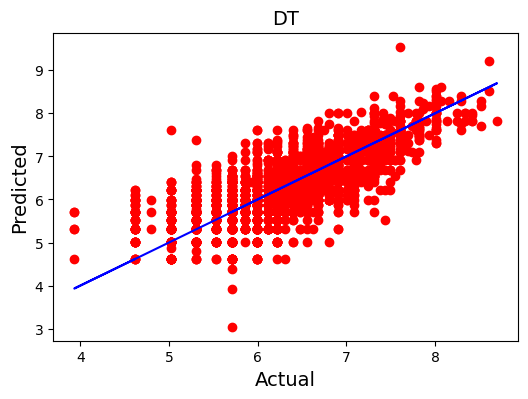

In [38]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_cv)
pred_Train=DT.predict(x_train)
print(DT)
print('R2_Score:', r2_score(y_cv,pred_DT))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_DT))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_DT))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_DT)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_DT,y=y_cv,color='red')
plt.plot(pred_DT,pred_DT,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('DT',fontsize=14)
plt.show()

SVR()
R2_Score: 0.16927214764788645
R2 Score on traing data:  0.1827671329924846
Mean absulute error: 0.49170229396919257
Mean scuared error: : 0.42470785909975384
Root Mean scuared error: : 0.651696140160239


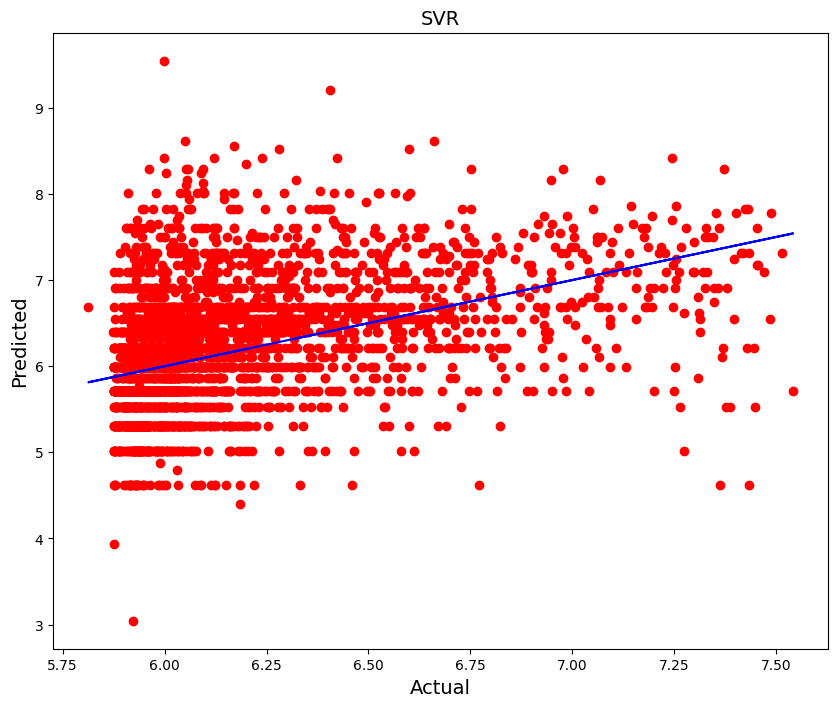

In [39]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_cv)
pred_Train=svr.predict(x_train)
print(svr)
print('R2_Score:', r2_score(y_cv,pred_svr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_svr))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_svr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_svr)))

plt.figure(figsize=(10,8))
plt.scatter(x=pred_svr,y=y_cv,color='red')
plt.plot(pred_svr,pred_svr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('SVR',fontsize=14)
plt.show()

ExtraTreesRegressor()
R2_Score: 0.7507148281243899
R2 Score on traing data:  1.0
Mean absulute error: 0.2746633390043418
Mean scuared error: : 0.12744651735563678
Root Mean scuared error: : 0.3569965228901211


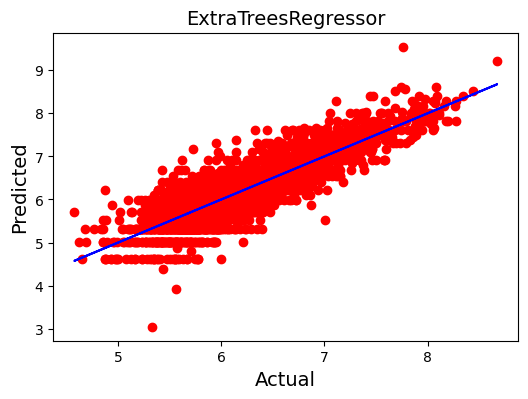

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_cv)
pred_Train=etr.predict(x_train)
print(etr)
print('R2_Score:', r2_score(y_cv,pred_etr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_cv,pred_etr))
print('Mean scuared error: :', mean_squared_error(y_cv,pred_etr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_cv,pred_etr)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_etr,y=y_cv,color='red')
plt.plot(pred_etr,pred_etr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=14)
plt.show()

In [ ]:
# cross validation

In [41]:
from sklearn.model_selection import cross_val_score


In [42]:
score1=cross_val_score(LR,X,y,cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,predLR)-score1.mean()*100))

[-2.71961656e+10 -2.45992465e+11 -3.27557660e+06 -9.51122666e+10
 -5.25781866e+10]
-84176471923.54764
Difference between r2score and cross validation score is:  8417407954495.2295


In [ ]:
score2=cross_val_score(RDF,X,y,cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_RDF)-score2.mean()*100))

In [ ]:
score3=cross_val_score(KN,X,y,cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_KN)-score3.mean()*100))

In [ ]:
score4=cross_val_score(GBR,X,y,cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_GBR)-score4.mean()*100))

In [ ]:
score5=cross_val_score(LS,X,y,cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_LS)-score5.mean()*100))

In [ ]:
score6=cross_val_score(DT,X,y,cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_DT)-score6.mean()*100))

In [ ]:
score7=cross_val_score(svr,X,y,cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_svr)-score7.mean()*100))

In [ ]:
score8=cross_val_score(etr,X,y,cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_cv,pred_etr)-score8.mean()*100))